In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Pathing

In [2]:
maindatapath = "../OSC-measuresments/"

oscpaths = [maindatapath + osc +"/" for osc in  os.listdir(maindatapath) if osc[-4:]!=".jpg"] # the paths to the folders of the samples

cellpaths = lambda osc : [ oscpaths[osc] + cell + "/" for cell in os.listdir(oscpaths[osc]) ]

measurementpaths = lambda osc, cell : [cellpaths(osc)[cell] + measurement for measurement in os.listdir(cellpaths(osc)[cell])]

measurement = lambda osc,cell,mm : np.loadtxt(measurementpaths(osc,cell)[mm], skiprows=1).T

print(measurement(0,0,0).shape)

(2, 201)


In [24]:
for i in range(len(oscpaths)):
    print(str(i) + ": "+oscpaths[i])

0: ../OSC-measuresments/OSC1/
1: ../OSC-measuresments/OSC2/
2: ../OSC-measuresments/OSC3/
3: ../OSC-measuresments/OSC4/
4: ../OSC-measuresments/OSC5/
5: ../OSC-measuresments/PatrickOSC/
6: ../OSC-measuresments/ReraSC/


## Cutting down Measurements to 4th quadrant

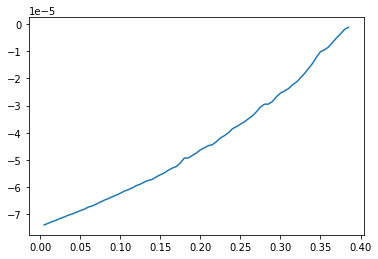

In [3]:
#measurementrelevant = lambda osc, cell, mm : np.where(measurement(osc,cell,mm)*np.array([[1],[-1]])>0,measurement(osc,cell,mm),0)
measurementrelevant = lambda osc, cell, mm : measurement(osc,cell,mm)[ : ,  np.where( np.all ( measurement(osc,cell,mm)*np.array([[1],[-1]])>0 , axis =(0)))[0] ] 
    # ^ slices the array down to all the pairs where the voltage is positive and the current is negative
mmr1 = measurementrelevant(0,0,2)
plt.plot(mmr1[0],mmr1[1])

## Interpolation

In [5]:
def interpolate(mat, witherrors=False):
    x1,x2 = mat[0]
    y1,y2 = mat[1]
    x0 = (y1*x2-y2*x1)/(y1-y2)
    return x0


def find_zeros(mm):
    V = mm[0]
    I = mm[1]
    iscindeces = [np.where(V<0)[0][-1],np.where(V>0)[0][0]]
    vocindeces = [np.where(I<0)[0][-1],np.where(I>0)[0][0]]
    isc = interpolate(np.array([[0,1],[1,0]])@mm[:,iscindeces]) # the matrix mult is to swap the voltage and current
    voc = interpolate(mm[:,vocindeces])
    return isc, voc, iscindeces, vocindeces

def power_curve(mmr):
    V,I = mmr
    P = V*np.abs(I)
    return P

measurement1 = measurement(0,0,1)

#print(measurement1[:,np.where(np.all(measurement1*np.array([[1],[-1]])>0,axis=(0)))[0]])

#measurement1[:,find_zeros(measurement1)[1]]

find_zeros(measurement1)

(-8.931019768108607e-05, 0.42458230262617314, [40, 41], [124, 125])

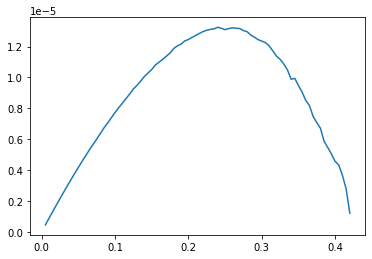

In [6]:
mr1 = measurementrelevant(0,0,1)
power1 = power_curve(mr1)
plt.plot(mr1[0],power1)

### Average Ratio between uncertainty in Area and Area

In [29]:
Areas = [[[59.98179058129378, 2.037060072502754],[63.18271304356203, 2.1294542343052365]],
[[58.381291409049226, 1.9911392100260337],[63.18271304356203, 2.1294542343052365],[59.18154437079939, 2.0140753032092644],[59.18154437079939, 2.0140753032092644]],
[[79.18620659205573, 2.5551844803038914],[83.50692025087656, 2.6861549355950944],[64.30301420466873, 2.107965006349283],[59.98179058129378, 1.9796650709022352],
[64.94318163083341, 2.1270430696405636]]] # [OSC1,OSC3,OSC5]
avxi=[]
for i in range(len(Areas)):
    avxii=0
    for j in range(len(Areas[i])):
        avxii+=Areas[i][j][1]/Areas[i][j][0]
    avxi.append(avxii/len(Areas[i]))
avxi

[0.033832211493689125, 0.033968298464789964, 0.03259469058814808]

$u_j = j\cdot \xi,\quad \xi = \frac{u_A}{A}$<p>
$u_{\overline{j},\text{sys}}\approx \overline{j}\cdot \xi$

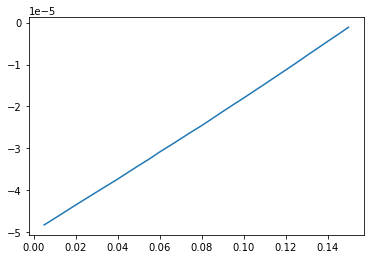

In [31]:
def jcurves (osc,cells,dupes)

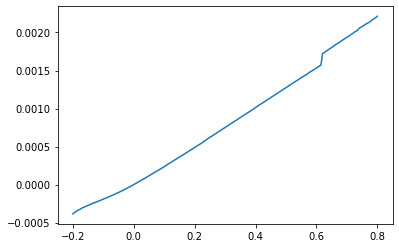

In [35]:
plt.plot(measurement(4,0,0)[0],measurement(4,0,0)[1])

## OSC 3